In [51]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

In [52]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
dataframe = dataframe.drop(columns=['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Embarked'])
encoder = LabelEncoder()
dataframe['Sex'] = encoder.fit_transform(dataframe['Sex'])
dataframe.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,1,22.0,0,7.2500
1,1,1,0,38.0,0,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,0,53.1000
4,0,3,1,35.0,0,8.0500


In [53]:
RFS = []
DTC = []
X = dataframe.drop(columns='Survived')
y = dataframe['Survived']
for random_state in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    rf = RandomForestClassifier().fit(X_train, y_train)
    RFS.append(rf.score(X_test, y_test))
    dt = DecisionTreeClassifier().fit(X_train, y_train)
    DTC.append(dt.score(X_test, y_test))

<Axes: ylabel='Count'>

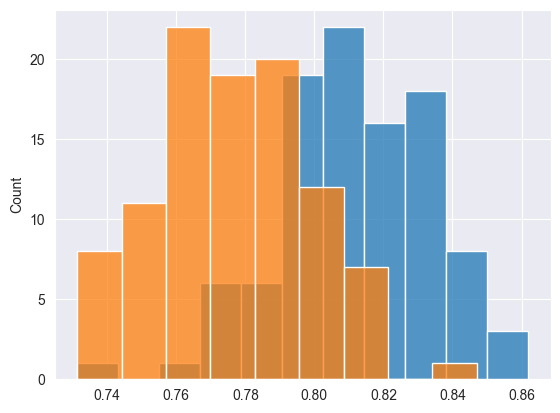

In [54]:
sns.histplot(RFS)
sns.histplot(DTC)

<Axes: ylabel='Count'>

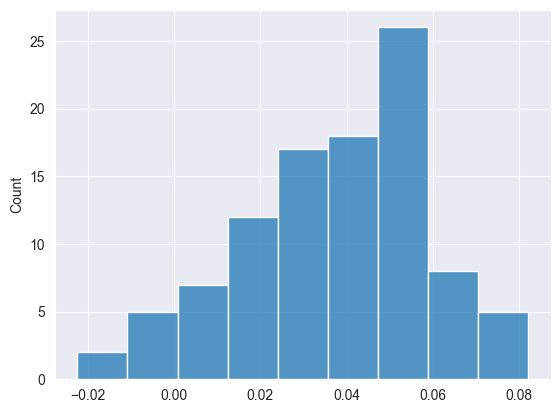

In [55]:
diference = [a - b for a, b in zip(RFS, DTC)]
sns.histplot(diference)

In [56]:
statistic, p_value = stats.ttest_ind(RFS, DTC)
statistic

11.596382764736683

In [57]:
p_value

4.592484700825442e-24

#### Interpretação 
Portanto, com base no valor-p muito pequeno, podemos concluir que há uma diferença estatisticamente significativa entre a performance do modelo Random Forest e do modelo Decision Tree. Essa diferença pode ser positiva (indicando que o modelo Random Forest é significativamente melhor) ou negativa (indicando que o modelo Decision Tree é significativamente melhor), dependendo da direção da diferença observada nas métricas de avaliação.

# Usando K-Fold (validação crusada)

In [62]:
rf = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(rf, X, y, cv=kf)

print("Score of iterations:", scores)

media_score = scores.mean()
print("Mean of iterations:", media_score)

Score of iterations: [0.7877095  0.82022472 0.79213483 0.83707865 0.82022472]
Mean of iterations: 0.8114744837110036


In [63]:
dt = DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(rf, X, y, cv=kf)

print("Score of iterations:", scores)
media_score = scores.mean()
print("Mean of iterations:", media_score)

Score of iterations: [0.84916201 0.7752809  0.85955056 0.85955056 0.7752809 ]
Mean of iterations: 0.8237649865042999


#### Iterpretação dos resultados 
Com os resultados acima podemos dizer que Decision tree é melhor para o caso 
